Note to self: sometimes nMatched = 2 even if recoVxy is not properly reconstructed (so shows up as nan in row). Since we don't really need recoVxy, we should't call .dropna() because that will underestimate the efficiency. What we care about is reco nMatched = 2 && trigger fired == True, regardless if vertexing was successful or not.

## Import libraries and init

In [1]:
import uproot
import ROOT
import numpy as np
import pandas as pd
from collections import OrderedDict
import seaborn as sns

%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
plt.style.use('default')
plt.rcParams['grid.linestyle'] = ':'

Welcome to JupyROOT 6.12/04


In [2]:
import sys
sys.version
sys.version_info

sys.version_info(major=3, minor=6, micro=3, releaselevel='final', serial=0)

## Load ntuples from analyzer

In [26]:
masses = [('60','20'),('52p5','5p0'),('6p0','2p0'),('5p25','0p5'),('84p0','8p0'),('3p15','0p3')\
          ('105p0','10p0'),('10p5','1p0'),('120p0','40p0'),('12p0','4p0'),('1p2','0p4'), \
            ('21p0','2p0'),('24p0','8p0'),('31p5','3p0'),('36p0','12p0'),('42p0','4p0'), \
            ('48p0','16p0'),('63p0','6p0'),('72p0','24p0'),('96p0','32p0'),('3p6','1p2')]
ctaus = [1,10,100,1000]
# triggerPath = 'TRIG_dsa_HLT_DoubleMu3_DCA_PFMET50_PFMHT60'
branchPaths = ['RECO_dsa']#, 'RECO_dgm', 'RECO_rsa', 'RECO_gbm']
baseDir = '../Firefighter/washAOD/TrigRecoEffStudies/Production/'
fileName = lambda Mchi, dMchi, ctau: baseDir + f'Mchi-{Mchi}_dMchi-{dMchi}_ctau-{ctau}.root'

numParams = len(masses)*len(ctaus)*len(branchPaths)

dfs = OrderedDict({})
overallCounter = 1
numEvents = OrderedDict({})
for (Mchi, dMchi) in masses:
    dfs[Mchi] = OrderedDict({})
    numEvents[Mchi] = OrderedDict({})
    for ctau in ctaus:
        dfs[Mchi][ctau] = OrderedDict({})
        for (k,branchPath) in enumerate(branchPaths):
            dfs[Mchi][ctau][k] = uproot.open(fileName(Mchi, dMchi, ctau))[branchPath + '/TrigRecoEffi'].pandas.df()
            print(f'{overallCounter} of {numParams}: ' + fileName(Mchi, dMchi, ctau))
            overallCounter += 1

1 of 20: ../Firefighter/washAOD/TrigRecoEffStudies/Production/Mchi-60_dMchi-20_ctau-1.root
2 of 20: ../Firefighter/washAOD/TrigRecoEffStudies/Production/Mchi-60_dMchi-20_ctau-10.root
3 of 20: ../Firefighter/washAOD/TrigRecoEffStudies/Production/Mchi-60_dMchi-20_ctau-100.root
4 of 20: ../Firefighter/washAOD/TrigRecoEffStudies/Production/Mchi-60_dMchi-20_ctau-1000.root
5 of 20: ../Firefighter/washAOD/TrigRecoEffStudies/Production/Mchi-52p5_dMchi-5p0_ctau-1.root
6 of 20: ../Firefighter/washAOD/TrigRecoEffStudies/Production/Mchi-52p5_dMchi-5p0_ctau-10.root
7 of 20: ../Firefighter/washAOD/TrigRecoEffStudies/Production/Mchi-52p5_dMchi-5p0_ctau-100.root
8 of 20: ../Firefighter/washAOD/TrigRecoEffStudies/Production/Mchi-52p5_dMchi-5p0_ctau-1000.root
9 of 20: ../Firefighter/washAOD/TrigRecoEffStudies/Production/Mchi-6p0_dMchi-2p0_ctau-1.root
10 of 20: ../Firefighter/washAOD/TrigRecoEffStudies/Production/Mchi-6p0_dMchi-2p0_ctau-10.root
11 of 20: ../Firefighter/washAOD/TrigRecoEffStudies/Producti

In [142]:
masses = list(set(masses)) # remove duplicates
totalLabels = dict((i[0],i) for i in masses)

In [152]:
masses40split = [i[0] for i in masses if float(i[1].replace('p','.')) == \
                 0.4 * (float(i[0].replace('p','.'))-float(i[1].replace('p','.'))/2)]
labels40split = [int(float(totalLabels[x][0].replace('p','.')) - float(totalLabels[x][1].replace('p','.'))/2) for x in masses40split]

masses10split = [i[0] for i in masses if float(i[1].replace('p','.')) == \
                 0.1 * (float(i[0].replace('p','.'))-float(i[1].replace('p','.'))/2)]
labels10split = [int(float(totalLabels[x][0].replace('p','.')) - float(totalLabels[x][1].replace('p','.'))/2) for x in masses10split]

## Inspect data

In [195]:
print(f"Events: {len(dfs['60'][10][0].dropna()}")
print(f"fired==True: {len(dfs['60'][10][0].dropna().query('fired==True'))}")
print(f"nMatched==2: {len(dfs['60'][10][0].dropna().query('nMatched==2'))}")
print(f"fired==True & nMatched==2: {len(dfs['60'][10][0].dropna().query('fired == True & nMatched == 2'))}")

Events: 37453
fired==True: 3232
nMatched==2: 12377
fired==True & nMatched==2: 3232


In [187]:
print(f"Events: {len(dfs['52p5'][1000][0].query('subentry==0'))}")
print(f"fired==True: {len(dfs['52p5'][1000][0].query('fired==True'))}")
print(f"nMatched==2: {len(dfs['52p5'][1000][0].query('nMatched==2'))}")
print(f"fired==True & nMatched==2: {len(dfs['52p5'][1000][0].query('fired == True & nMatched == 2'))}")

Events: 19293
fired==True: 5813
nMatched==2: 2647
fired==True & nMatched==2: 1007


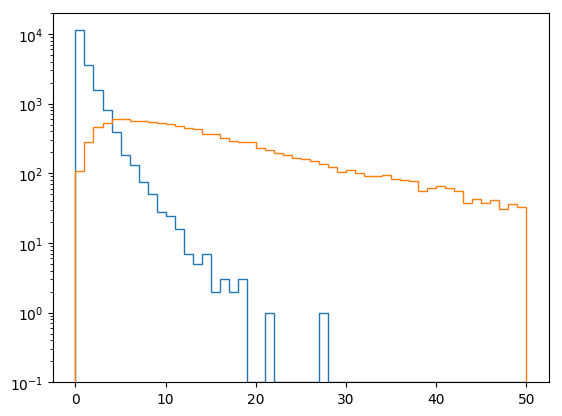

In [178]:
plt.hist(dfs['60'][10][0].query('subentry==0')['genVxy'], bins=50, range=(0,50),histtype='step',log=True)
plt.hist(dfs['60'][10][0].query('subentry==0&nMatched==2')['recoVxy'].dropna(), bins=50, range=(0,50),histtype='step');

## Calculate overall efficiency (trigger + muon reco)

In [204]:
print(len(dfs['60'][10][0].query('subentry==0')))
print(len(dfs['60'][10][0].query('subentry==0&fired==True&nMatched==2')))

18141
3337


In [183]:
### Eff. for 40% splitting
eff40split = OrderedDict()
lowerRanges = [i for i in np.arange(0,300,20)]
upperRanges = [i for i in np.arange(20,320,20)]
numerator = OrderedDict()
denominator = OrderedDict()
for mchi in masses40split:
    numerator[mchi] = OrderedDict()
    denominator[mchi] = OrderedDict()
    for lowerRange, upperRange in zip(lowerRanges, upperRanges):
        numerator[mchi][lowerRange] = 0
        denominator[mchi][lowerRange] = 0
        basicCrit = 'subentry==0'
        vertexCrit = 'genVxy > ' + str(lowerRange) + ' & genVxy < ' + str(upperRange)
        recoCrit = 'fired == True & nMatched == 2'
        for ctau in ctaus:
            numerator[mchi][lowerRange] += len(dfs[mchi][ctau][0].query(' & '.join([recoCrit, vertexCrit, basicCrit])))
            denominator[mchi][lowerRange] += len(dfs[mchi][ctau][0].query(' & '.join([basicCrit,vertexCrit])))
for mchi in masses40split:
    eff40split[mchi] = OrderedDict()
    for lowerRange, upperRange in zip(lowerRanges, upperRanges):
        eff40split[mchi][lowerRange] = numerator[mchi][lowerRange]/denominator[mchi][lowerRange]

### Eff. for 10% splitting
eff10split = OrderedDict()
for mchi in masses10split:
    numerator[mchi] = OrderedDict()
    denominator[mchi] = OrderedDict()
    for lowerRange, upperRange in zip(lowerRanges, upperRanges):
        numerator[mchi][lowerRange] = 0
        denominator[mchi][lowerRange] = 0
        basicCrit = 'subentry==0'
        vertexCrit = 'genVxy > ' + str(lowerRange) + ' & genVxy < ' + str(upperRange)
        recoCrit = 'fired == True & nMatched == 2'
        for ctau in ctaus:
            numerator[mchi][lowerRange] += len(dfs[mchi][ctau][0].query(' & '.join([recoCrit, vertexCrit, basicCrit])))
            denominator[mchi][lowerRange] += len(dfs[mchi][ctau][0].query(' & '.join([basicCrit,vertexCrit])))

for mchi in masses10split:
    eff10split[mchi] = OrderedDict()
    for lowerRange, upperRange in zip(lowerRanges, upperRanges):
        eff10split[mchi][lowerRange] = numerator[mchi][lowerRange]/denominator[mchi][lowerRange]

## Plot efficiency maps

In [184]:
from matplotlib.ticker import FormatStrFormatter

In [185]:
plotdfs = OrderedDict()
plotdfs['10']=pd.DataFrame.from_dict(eff10split)
plotdfs['40']=pd.DataFrame.from_dict(eff40split)
# newindexlabels = (plotdfs.index.get_values().astype(float)).astype(int)
# newcolumnlabels = ['50', '5']
# plotdfs.index = pd.Index(newindexlabels)
# plotdfs.columns = pd.Index(newcolumnlabels)
# plotdfs

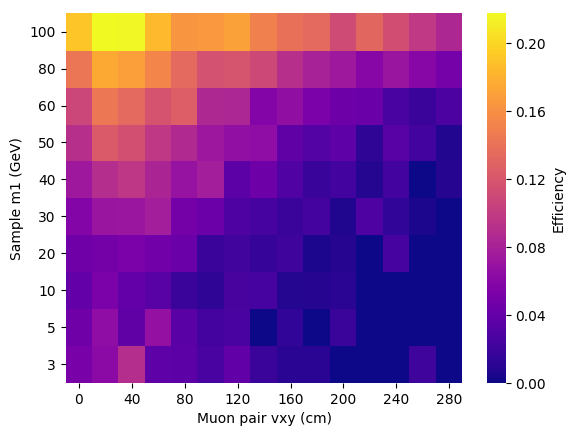

In [188]:
g = sns.heatmap(plotdfs['10'].transpose()[::-1], cmap='plasma', xticklabels=2, yticklabels=labels10split[::-1], cbar_kws={'label': 'Efficiency'})
for item in g.get_yticklabels():
    item.set_rotation(0)
plt.xlabel('Muon pair vxy (cm)')
plt.ylabel('Sample m1 (GeV)');

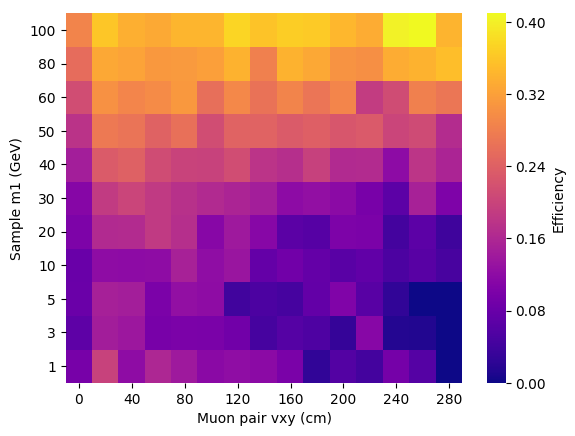

In [189]:
g = sns.heatmap(plotdfs['40'].transpose()[::-1], cmap='plasma', xticklabels=2, yticklabels=labels40split[::-1], cbar_kws={'label': 'Efficiency'})
for item in g.get_yticklabels():
    item.set_rotation(0)
plt.xlabel('Muon pair vxy (cm)')
plt.ylabel('Sample m1 (GeV)');